In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [28]:
df = pd.read_csv("DIABETES PROCESSDED.csv")
print(df)

     S.NO PATIENT ID  PATIENT NAME    DATE  AGE   BMI  FASTING  POSTING  TYPE  \
0       1       S001    ELANTAMIL   Feb-24   74  25.0      110      350     2   
1       2       S002     BOOPATHI   Feb-24   53  25.0      125      350     1   
2       3       S003     GOPINATH   Feb-24   49  22.0      128      230     1   
3       4       S004       MAGESH   Feb-24   52  22.0      135      230     2   
4       5       S005  VANAMAMALAI   Feb-24   53  29.0      130      220     1   
..    ...        ...           ...     ...  ...   ...      ...      ...   ...   
893   894       S894       AAYANSH  Feb-24   49  37.0      150      230     1   
894   895       S895         ADVIK  May-24   52  22.0      110      225     1   
895   896       S896        ATHARV  May-24   40  24.5      125      225     1   
896   897       S897   KANIKAI RAJ  May-24   73  22.0      140      170     2   
897   898       S898     MARY RANI  May-24   51  31.0      150      210     1   

     CARBOHYDRATE BLOOD PRE

In [29]:
print(df.head(10))

   S.NO PATIENT ID  PATIENT NAME    DATE  AGE   BMI  FASTING  POSTING  TYPE  \
0     1       S001    ELANTAMIL   Feb-24   74  25.0      110      350     2   
1     2       S002     BOOPATHI   Feb-24   53  25.0      125      350     1   
2     3       S003     GOPINATH   Feb-24   49  22.0      128      230     1   
3     4       S004       MAGESH   Feb-24   52  22.0      135      230     2   
4     5       S005  VANAMAMALAI   Feb-24   53  29.0      130      220     1   
5     6       S006       ROKESH   Feb-24   49  37.0       80      220     1   
6     7       S007       DEEPAK   Feb-24   65  27.0       80      230     1   
7     8       S008     RABINASH   Feb-24   65  27.0       80      230     1   
8     9       S009       MUTTHU   Feb-24   58  31.0      135      170     1   
9    10       S010       SAIRAM   Feb-24   46  31.0      135      170     1   

   CARBOHYDRATE BLOOD PRESSURE  
0            45         120/80  
1            55         120/80  
2            59        180/220 

In [30]:
print(df.tail(10))


     S.NO PATIENT ID PATIENT NAME    DATE  AGE   BMI  FASTING  POSTING  TYPE  \
888   889       S889       AKSHAY  Jan-24   73  22.0      128      450     1   
889   890       S890   NIDERSCHNA  Feb-24   76  25.0      101      310     1   
890   891       S891        MALLU  Feb-24   42  30.0       80      200     1   
891   892       S892       SWATHA  Feb-24   63  30.0      150      200     1   
892   893       S893        ARJUN  Feb-24   63  37.0      150      230     1   
893   894       S894      AAYANSH  Feb-24   49  37.0      150      230     1   
894   895       S895        ADVIK  May-24   52  22.0      110      225     1   
895   896       S896       ATHARV  May-24   40  24.5      125      225     1   
896   897       S897  KANIKAI RAJ  May-24   73  22.0      140      170     2   
897   898       S898    MARY RANI  May-24   51  31.0      150      210     1   

     CARBOHYDRATE BLOOD PRESSURE  
888            57         120/80  
889            62         150/90  
890           

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.NO            898 non-null    int64  
 1   PATIENT ID      898 non-null    object 
 2   PATIENT NAME    898 non-null    object 
 3   DATE            898 non-null    object 
 4   AGE             898 non-null    int64  
 5   BMI             898 non-null    float64
 6   FASTING         898 non-null    int64  
 7   POSTING         898 non-null    int64  
 8   TYPE            898 non-null    int64  
 9   CARBOHYDRATE    898 non-null    int64  
 10  BLOOD PRESSURE  898 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 77.3+ KB
None


In [32]:
df.shape

(898, 11)

In [33]:
result = df.dtypes
print(result)

S.NO                int64
PATIENT ID         object
PATIENT NAME       object
DATE               object
AGE                 int64
BMI               float64
FASTING             int64
POSTING             int64
TYPE                int64
CARBOHYDRATE        int64
BLOOD PRESSURE     object
dtype: object


In [34]:
size = df.size
print("Size = {}".format(size))

Size = 9878


In [35]:
shape = df.shape
print("Shape = {}".format(shape))

Shape = (898, 11)


In [36]:
desc = df.describe()
print(desc)

             S.NO         AGE         BMI     FASTING     POSTING        TYPE  \
count  898.000000  898.000000  898.000000  898.000000  898.000000  898.000000   
mean   449.500000   58.249443   25.788419  131.698218  262.334076    1.513363   
std    259.374568   11.200420    4.656818   33.659506   88.197140    0.500100   
min      1.000000   25.000000   12.000000   80.000000  170.000000    1.000000   
25%    225.250000   49.000000   22.000000  110.000000  200.000000    1.000000   
50%    449.500000   56.000000   25.000000  130.000000  225.000000    2.000000   
75%    673.750000   66.000000   29.000000  150.000000  310.000000    2.000000   
max    898.000000   84.000000   37.000000  200.000000  450.000000    2.000000   

       CARBOHYDRATE  
count    898.000000  
mean      53.458797  
std        8.626847  
min       27.000000  
25%       49.000000  
50%       55.000000  
75%       60.000000  
max       78.000000  


In [37]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#254E58'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
    ]) \
    .set_properties(**{'font-size': '14px', 'background-color': '#F5F5F5', 'border-collapse': 'collapse', 'margin': '10px'})
styled_df

,S.NO,AGE,BMI,FASTING,POSTING,TYPE,CARBOHYDRATE
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,449.500000,58.249443,25.788419,131.698218,262.334076,1.513363,53.458797
std,259.374568,11.200420,4.656818,33.659506,88.197140,0.500100,8.626847
min,1.000000,25.000000,12.000000,80.000000,170.000000,1.000000,27.000000
25%,225.250000,49.000000,22.000000,110.000000,200.000000,1.000000,49.000000
50%,449.500000,56.000000,25.000000,130.000000,225.000000,2.000000,55.000000
75%,673.750000,66.000000,29.000000,150.000000,310.000000,2.000000,60.000000
max,898.000000,84.000000,37.000000,200.000000,450.000000,2.000000,78.000000


In [38]:
df = pd.DataFrame(df)
print(df[['FASTING', 'POSTING']])

     FASTING  POSTING
0        110      350
1        125      350
2        128      230
3        135      230
4        130      220
..       ...      ...
893      150      230
894      110      225
895      125      225
896      140      170
897      150      210

[898 rows x 2 columns]


In [39]:
df = pd.DataFrame(df)
print(df)


     S.NO PATIENT ID  PATIENT NAME    DATE  AGE   BMI  FASTING  POSTING  TYPE  \
0       1       S001    ELANTAMIL   Feb-24   74  25.0      110      350     2   
1       2       S002     BOOPATHI   Feb-24   53  25.0      125      350     1   
2       3       S003     GOPINATH   Feb-24   49  22.0      128      230     1   
3       4       S004       MAGESH   Feb-24   52  22.0      135      230     2   
4       5       S005  VANAMAMALAI   Feb-24   53  29.0      130      220     1   
..    ...        ...           ...     ...  ...   ...      ...      ...   ...   
893   894       S894       AAYANSH  Feb-24   49  37.0      150      230     1   
894   895       S895         ADVIK  May-24   52  22.0      110      225     1   
895   896       S896        ATHARV  May-24   40  24.5      125      225     1   
896   897       S897   KANIKAI RAJ  May-24   73  22.0      140      170     2   
897   898       S898     MARY RANI  May-24   51  31.0      150      210     1   

     CARBOHYDRATE BLOOD PRE

In [40]:
median_value = df['BMI'].median()
print(median_value)

25.0


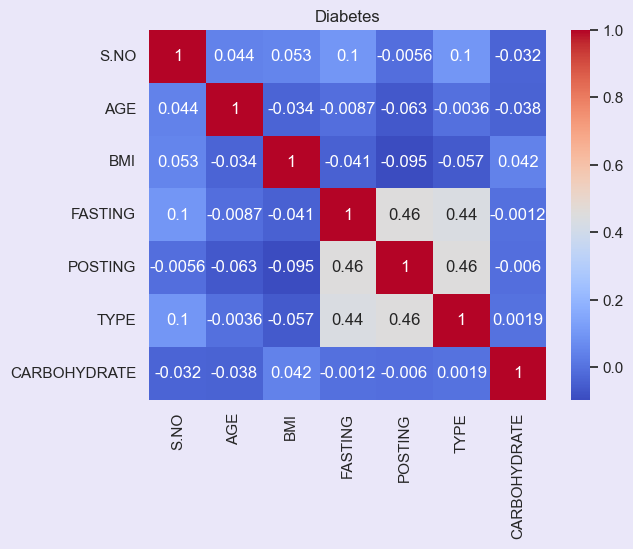

In [41]:
con_df = df.select_dtypes(include='number')
correlation_matrix = con_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Diabetes")
plt.show()


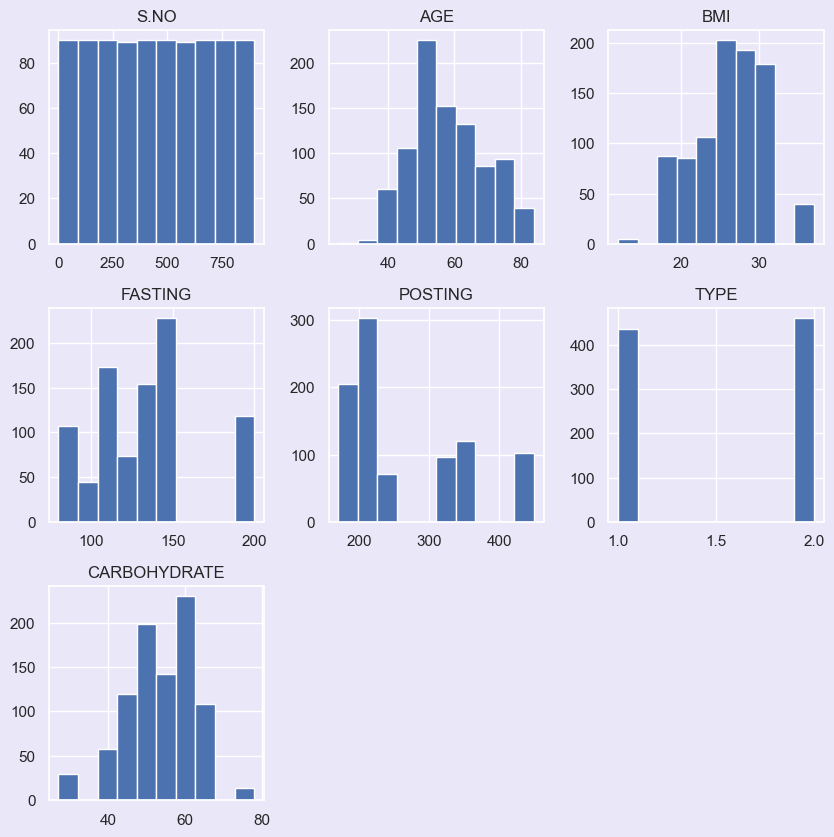

In [42]:
df.hist(figsize = (10,10))
plt.show()

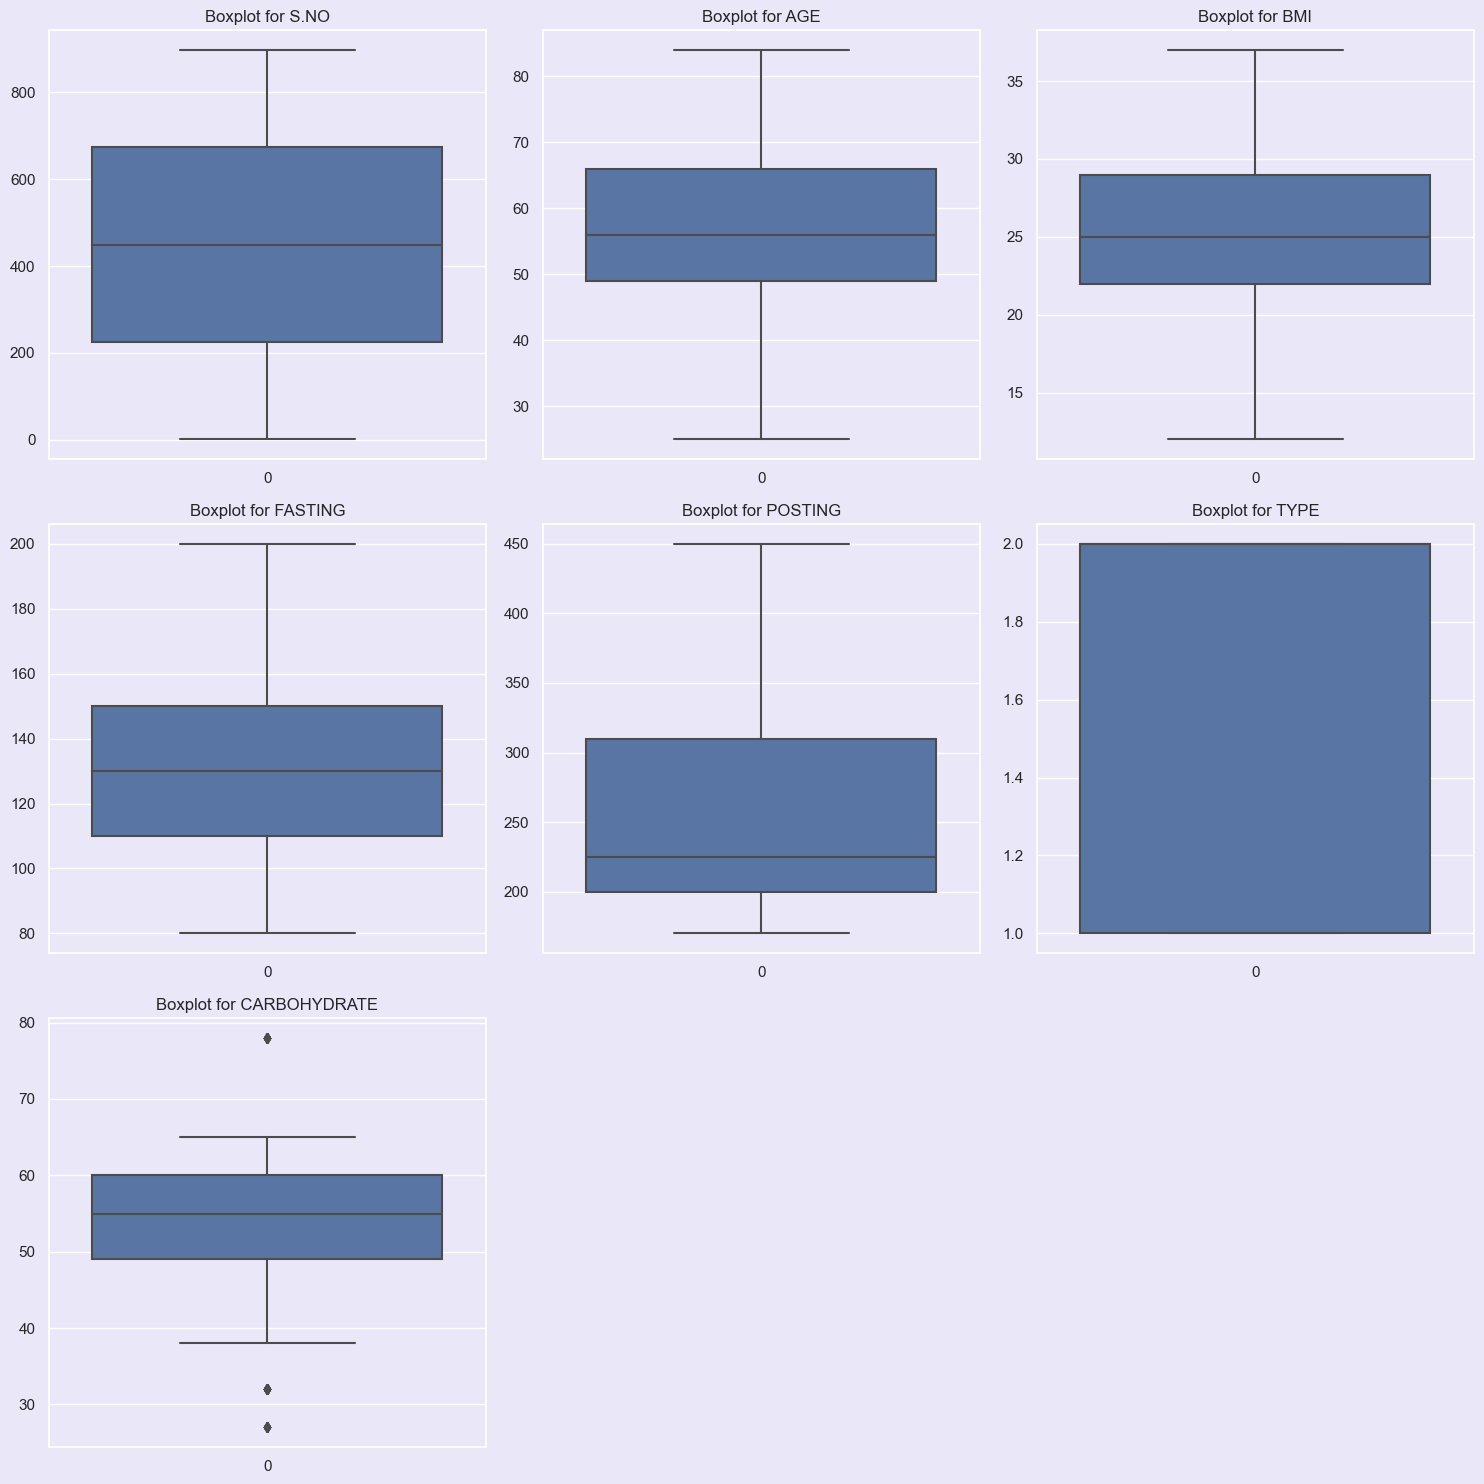

In [43]:
# Select only numeric columns for plotting
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_columns)
num_rows = (num_cols + 2) // 3  # Adjust rows based on the number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


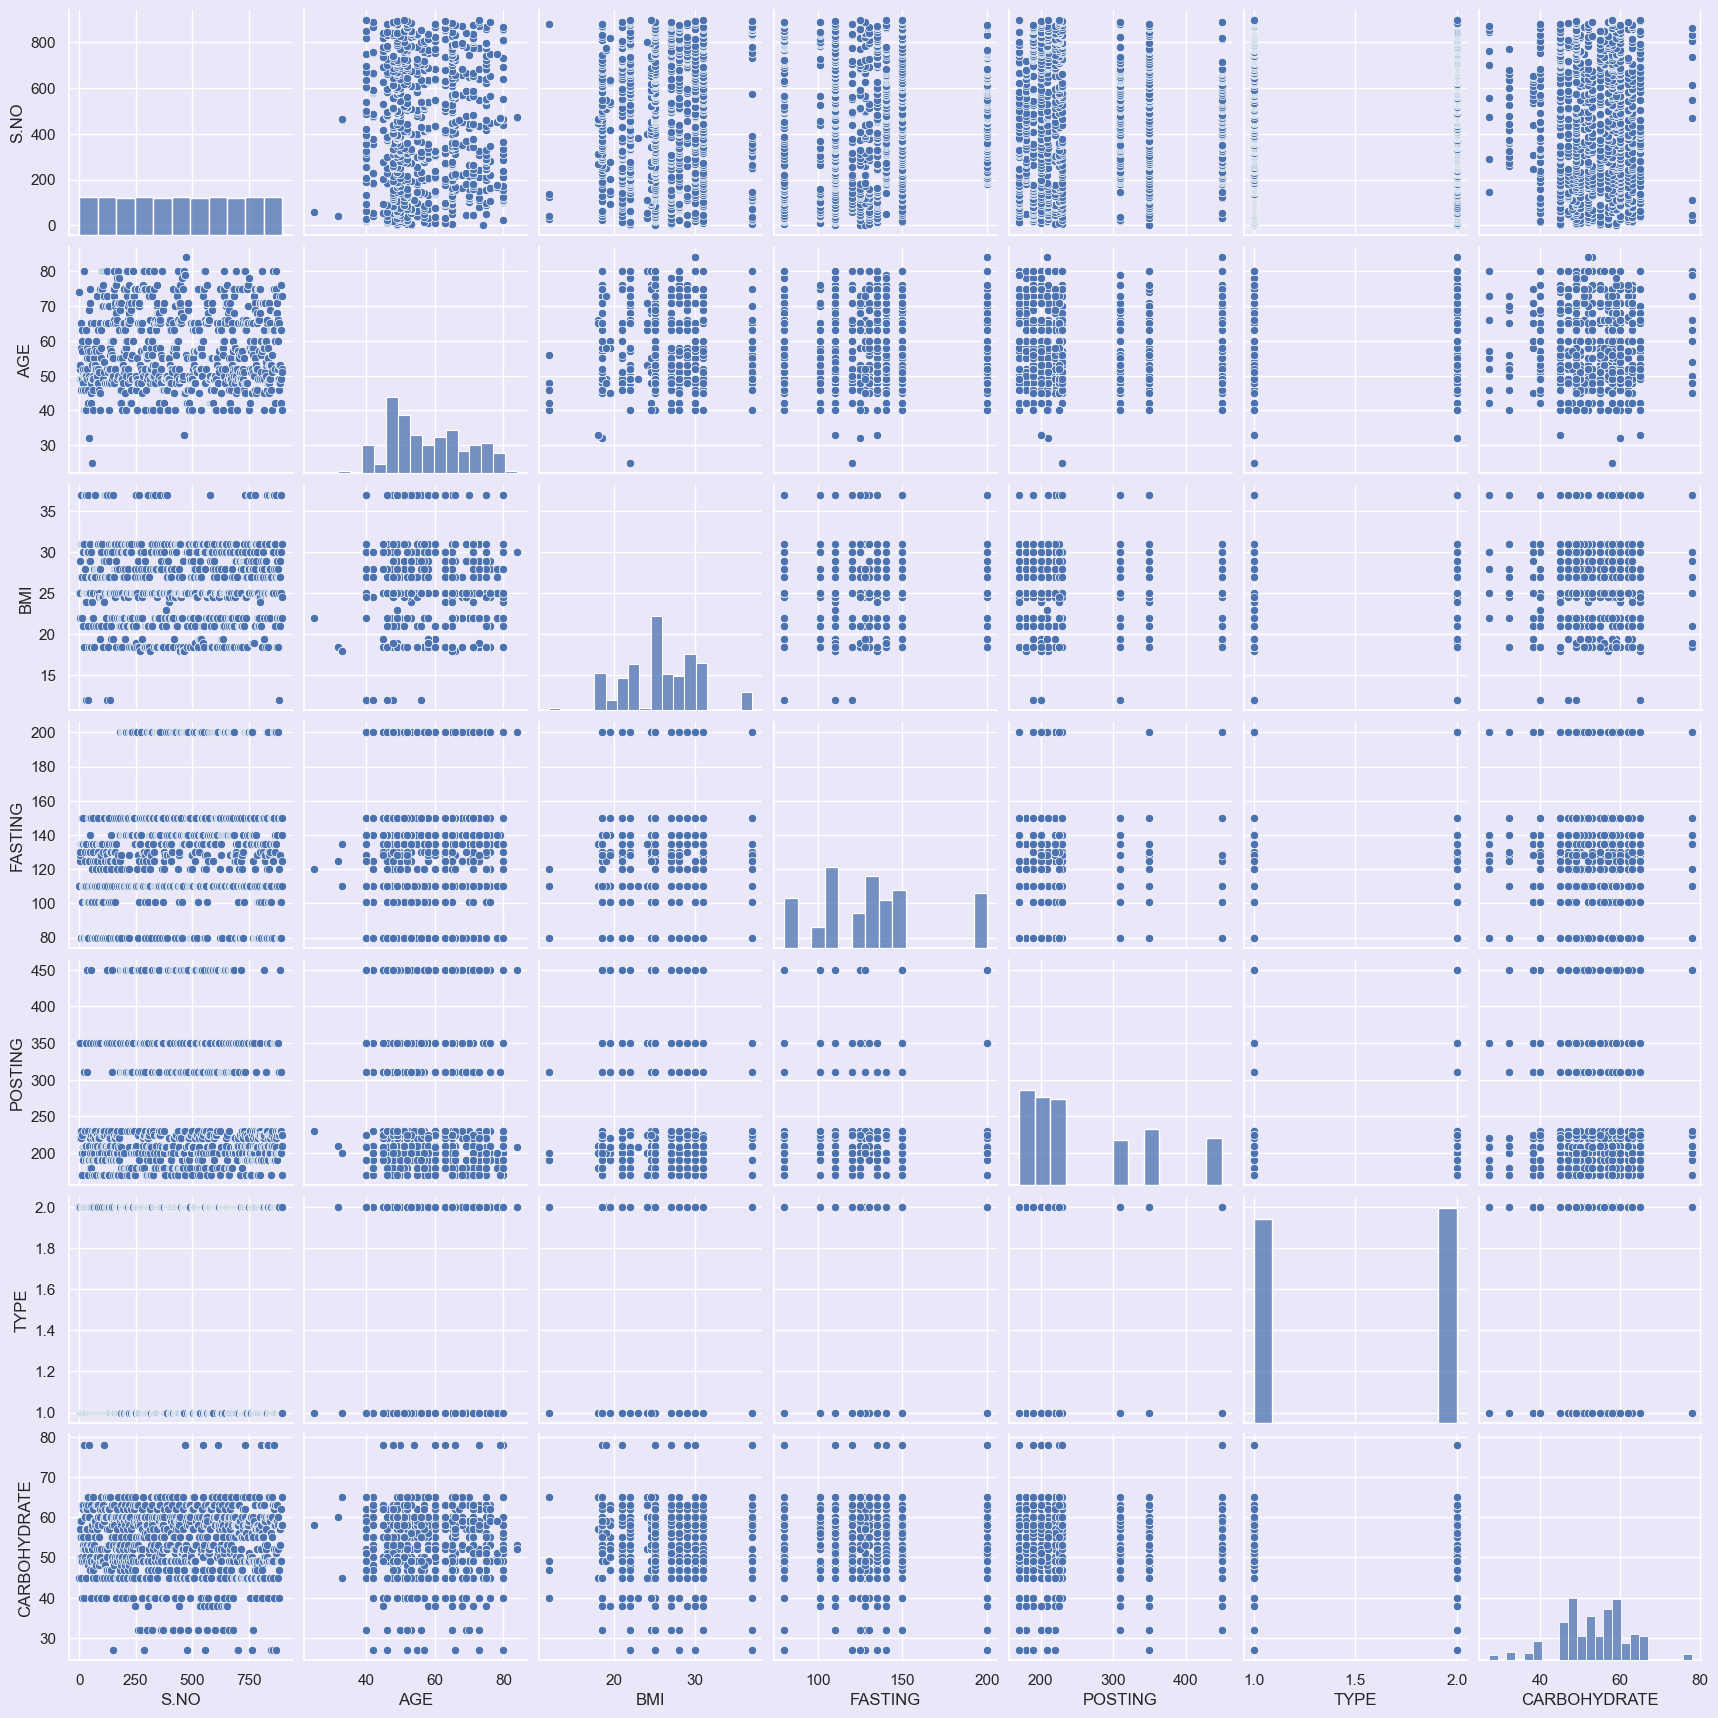

In [44]:
sns.pairplot(data = df )
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'BMI and AGE CORRELATION')

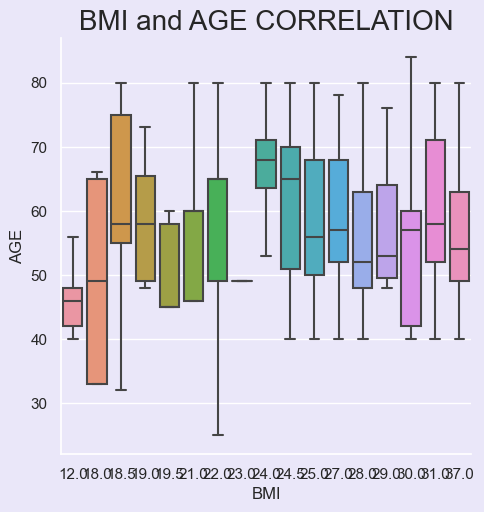

In [45]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="BMI",y="AGE", data=df, kind='box')
plt.title("BMI and AGE CORRELATION", size=20, y=1.0)

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


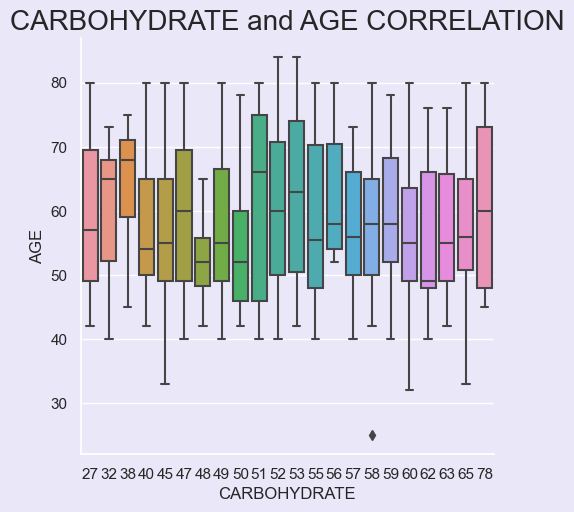

In [46]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="CARBOHYDRATE",y="AGE", data=df, kind='box')
plt.title("CARBOHYDRATE and AGE CORRELATION", size=20, y=1.0);

In [47]:
data = pd.read_csv('DIABETES PROCESSDED.csv')
data = data.drop(columns=['S.NO', 'PATIENT ID', 'PATIENT NAME', 'DATE'])
data[['SYSTOLIC', 'DIASTOLIC']] = data['BLOOD PRESSURE'].str.split('/', expand=True)
data = data.drop(columns=['BLOOD PRESSURE'])
data['SYSTOLIC'] = pd.to_numeric(data['SYSTOLIC'])
data['DIASTOLIC'] = pd.to_numeric(data['DIASTOLIC'])
numerical_cols = ['AGE', 'BMI', 'FASTING', 'POSTING', 'CARBOHYDRATE', 'SYSTOLIC', 'DIASTOLIC']
categorical_cols = []  
X = data[numerical_cols + categorical_cols]
y = data['TYPE']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7444444444444445
Precision: 0.748868778280543
Recall: 0.7444444444444445
F1-score: 0.7433035714285714


In [48]:
data = pd.read_csv('DIABETES PROCESSDED.csv')

data = data.drop(columns=['S.NO', 'PATIENT NAME', 'DATE'])

data[['SYSTOLIC', 'DIASTOLIC']] = data['BLOOD PRESSURE'].str.split('/', expand=True)
data = data.drop(columns=['BLOOD PRESSURE'])

data['SYSTOLIC'] = pd.to_numeric(data['SYSTOLIC'])
data['DIASTOLIC'] = pd.to_numeric(data['DIASTOLIC'])
categorical_cols = ['PATIENT ID']
numerical_cols = ['AGE', 'BMI', 'FASTING', 'POSTING', 'CARBOHYDRATE', 'SYSTOLIC', 'DIASTOLIC']

X = data[numerical_cols + categorical_cols]
y = data['TYPE']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.7888888888888889
Precision: 0.7890316205533597
Recall: 0.7888888888888889
F1-score: 0.7888628225706876


In [49]:
data = pd.read_csv('DIABETES PROCESSDED.csv')
data = data.drop(columns=['S.NO', 'PATIENT ID', 'PATIENT NAME', 'DATE'])
data[['SYSTOLIC', 'DIASTOLIC']] = data['BLOOD PRESSURE'].str.split('/', expand=True)
data = data.drop(columns=['BLOOD PRESSURE'])
data['SYSTOLIC'] = pd.to_numeric(data['SYSTOLIC'])
data['DIASTOLIC'] = pd.to_numeric(data['DIASTOLIC'])
numerical_cols = ['AGE', 'BMI', 'FASTING', 'POSTING', 'CARBOHYDRATE', 'SYSTOLIC', 'DIASTOLIC']
categorical_cols = [] 
X = data[numerical_cols + categorical_cols]
y = data['TYPE']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
       
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Evaluate each model and print results
for name, model in models:
    accuracy, precision, recall, f1 = evaluate_model(model)
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Random Forest
def predict_new_data(age, bmi, fasting, posting, carbohydrate, systolic, diastolic):
    # Create a DataFrame for the new data
    new_data = pd.DataFrame({
        'AGE': [age],
        'BMI': [bmi],
        'FASTING': [fasting],
        'POSTING': [posting],
        'CARBOHYDRATE': [carbohydrate],
        'SYSTOLIC': [systolic],
        'DIASTOLIC': [diastolic]
    })

    # Ensure the columns match those used for training
    new_data = new_data[numerical_cols + categorical_cols]

    # Use the pipeline to make predictions
    best_model = RandomForestClassifier(random_state=42)
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', best_model)
    ])
    best_pipeline.fit(X_train, y_train)
    prediction = best_pipeline.predict(new_data)
    return prediction[0]

# Collect real-time input from the user
age = int(input("Enter age: "))
bmi = float(input("Enter BMI: "))
fasting = float(input("Enter fasting blood sugar level: "))
posting = float(input("Enter posting blood sugar level: "))
carbohydrate = float(input("Enter carbohydrate intake: "))
systolic = float(input("Enter systolic blood pressure: "))
diastolic = float(input("Enter diastolic blood pressure: "))

# Predict the result
result = predict_new_data(age, bmi, fasting, posting, carbohydrate, systolic, diastolic)
print(f"The prediction is: {'Diabetic' if result == 1 else 'Non-Diabetic'}")

Random Forest - Accuracy: 0.8222, Precision: 0.8281, Recall: 0.8222, F1-score: 0.8214
SVM - Accuracy: 0.7889, Precision: 0.7983, Recall: 0.7889, F1-score: 0.7872
Naive Bayes - Accuracy: 0.7722, Precision: 0.7849, Recall: 0.7722, F1-score: 0.7697
Gradient Boosting - Accuracy: 0.8167, Precision: 0.8215, Recall: 0.8167, F1-score: 0.8160
The prediction is: Diabetic
